# A 3D cube

### Setup 

 Basic stack for scientific computation uses numpy (for quick numerical computation). 
 Sympy is a symbolic math computation. 
 

In [1]:
# Import packages for a scientific environment
import matplotlib.pyplot as mpl
import numpy as np
import ipywidgets as widgets
from IPython.display import display

%matplotlib widget
print("numpy version = %s" % np.__version__)

numpy version = 1.23.2


## A straight 3D Cube

We begin by introducing an array of vertices of a 3D cube.

In [2]:
CubeVertices = np.array(
    [
        [0, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        [1, 1, 0],
        [0, 0, 1],
        [1, 0, 1],
        [0, 1, 1],
        [1, 1, 1],
    ]
)

Next we count all the vertexes of the cube and connect figure out the indexes of the vertexes that should be connected by an edge

In [3]:
CubeEdges = []
for i, vertex_i in enumerate(CubeVertices):
    for j, vertex_j in enumerate(CubeVertices):
        if i > j and np.linalg.norm(vertex_i - vertex_j) < 1.1:
            CubeEdges.append([i, j])
display(CubeEdges)

[[1, 0],
 [2, 0],
 [3, 1],
 [3, 2],
 [4, 0],
 [5, 1],
 [5, 4],
 [6, 2],
 [6, 4],
 [7, 3],
 [7, 5],
 [7, 6]]

## Rotation matrices

In [4]:
def XRotationMatrix(angle):
    return np.array(
        [
            [1, 0, 0],
            [0, np.cos(angle), -np.sin(angle)],
            [0, np.sin(angle), np.cos(angle)],
        ]
    )


def YRotationMatrix(angle):
    return np.array(
        [
            [np.cos(angle), 0, np.sin(angle)],
            [0, 1, 0],
            [-np.sin(angle), 0, np.cos(angle)],
        ]
    )


def ZRotationMatrix(angle):
    return np.array(
        [
            [np.cos(angle), -np.sin(angle), 0],
            [np.sin(angle), np.cos(angle), 0],
            [0, 0, 1],
        ]
    )

def CreateRotationMatrix(xangle, yangle, zangle):
    return np.matmul(
        np.matmul(XRotationMatrix(xangle), YRotationMatrix(yangle)),
        ZRotationMatrix(zangle),
    )

print("Rotation matrixes w.r.t the x, y, and z axes with angle=1:\n") 
display(XRotationMatrix(1), YRotationMatrix(1), ZRotationMatrix(1))

RotationMatrix = CreateRotationMatrix(0, 0, 0)

print("\n\nA full rotation matrix with angles x=1,y=2,z=3:\n") 
display(RotationMatrix)

Rotation matrixes w.r.t the x, y, and z axes with angle=1:



array([[ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.54030231, -0.84147098],
       [ 0.        ,  0.84147098,  0.54030231]])

array([[ 0.54030231,  0.        ,  0.84147098],
       [ 0.        ,  1.        ,  0.        ],
       [-0.84147098,  0.        ,  0.54030231]])

array([[ 0.54030231, -0.84147098,  0.        ],
       [ 0.84147098,  0.54030231,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])



A full rotation matrix with angles x=1,y=2,z=3:



array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

Using the rotation matrix we can generate the vertexes of a rotated cube:

In [5]:
def update_RotatedCubeVertices(change=None):
    global RotationMatrix
    global RotatedCubeVertices
    RotatedCubeVertices = []
    for vertex in CubeVertices:
        RotatedCubeVertices.append(np.matmul(RotationMatrix, vertex))
    RotatedCubeVertices = np.array(RotatedCubeVertices)


update_RotatedCubeVertices()

In [6]:
display(RotatedCubeVertices)

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 1., 0.],
       [0., 0., 1.],
       [1., 0., 1.],
       [0., 1., 1.],
       [1., 1., 1.]])

## Plotting the rotated Cube

Let us now plot the rotated cube.

Button(description='Update', style=ButtonStyle())

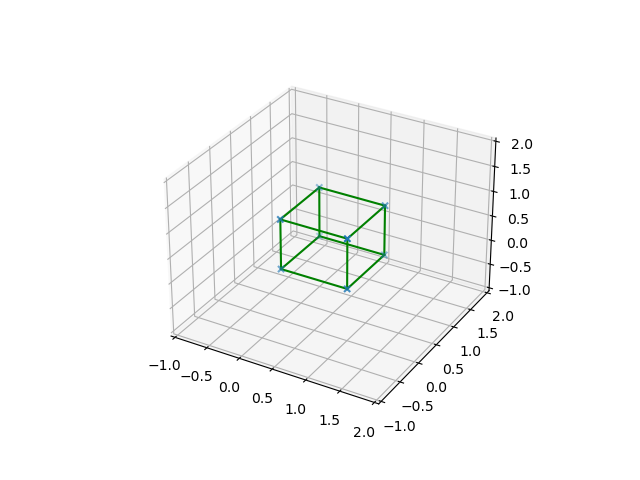

In [7]:
try:
    mpl.close(fig_RotatedCube)
except (NameError, AttributeError):
    pass
fig_RotatedCube = mpl.figure()
ax_RotatedCube = fig_RotatedCube.add_subplot(projection="3d")


def update_fig_RotatedCube(button=None):
    ax_RotatedCube.cla()
    ax_RotatedCube.set(xlim=(-1, 2), ylim=(-1, 2), zlim=(-1, 2))
    
    ax_RotatedCube.scatter(RotatedCubeVertices[:, 0], RotatedCubeVertices[:, 1], RotatedCubeVertices[:, 2], marker="x")
    for i,j in CubeEdges:
        ax_RotatedCube.plot(*RotatedCubeVertices[[i,j]].T,color="green")
    


update_fig_RotatedCube()

btn_updatefigRotatedCube = widgets.Button(description="Update")
display(btn_updatefigRotatedCube)
btn_updatefigRotatedCube.on_click(update_fig_RotatedCube)

In [8]:
angle_x = widgets.FloatSlider(
    value=0,
    min=0,
    max=2 * np.pi,
    continuous_update=True,
    description="Angle around x axis",
    style=dict(description_width="initial"),
)
angle_y = widgets.FloatSlider(
    value=0,
    min=0,
    max=2 * np.pi,
    description="Angle around y axis",
    continuous_update=True,
    style=dict(description_width="initial"),
)
angle_z = widgets.FloatSlider(
    value=0,
    min=0,
    max=2 * np.pi,
    description="Angle around z axis",
    continuous_update=True,
    style=dict(description_width="initial"),
)

angles = widgets.VBox([angle_x, angle_y, angle_z])

display(angles)


In [9]:
output_RotationMatrix = widgets.Output()
with output_RotationMatrix:
    display("Rotation Matrix:")
    display(RotationMatrix)


def UpdateRotationMatrix(change=None):
    global RotationMatrix
    global angle_x
    global angle_y
    global angle_z
    RotationMatrix = CreateRotationMatrix(angle_x.value, angle_y.value, angle_z.value)
    with output_RotationMatrix:
        output_RotationMatrix.clear_output()
        display("Rotation Matrix:")
        display(RotationMatrix)


display(output_RotationMatrix)

Output()

In [10]:

def on_update_angles(change=None):
    UpdateRotationMatrix()
    update_RotatedCubeVertices()
    update_fig_RotatedCube()


angle_x.observe(on_update_angles, names="value")
angle_y.observe(on_update_angles, names="value")
angle_z.observe(on_update_angles, names="value")


## Projecting the rotated cube onto the $x,y$ plane

Button(description='Update', style=ButtonStyle())

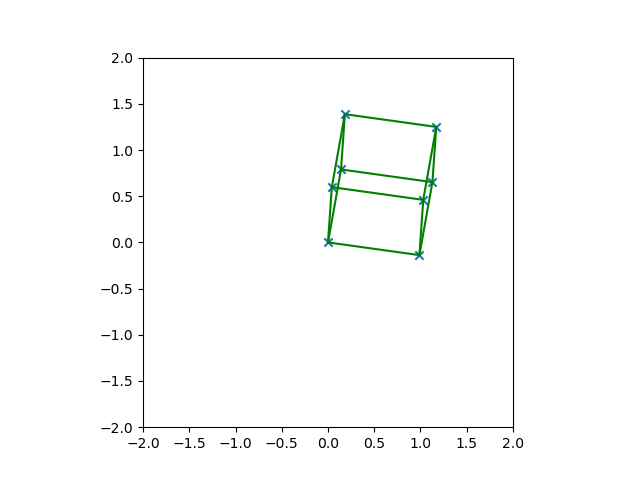

In [11]:
try:
    mpl.close(fig_RotatedCube2D)
except (NameError, AttributeError):
    pass
fig_RotatedCube2D = mpl.figure()
ax_RotatedCube2D = fig_RotatedCube2D.add_subplot()


def update_fig_RotatedCube2D(button=None):
    ax_RotatedCube2D.cla()
    ax_RotatedCube2D.set(aspect=1, xlim=(-2, 2), ylim=(-2, 2))

    ax_RotatedCube2D.scatter(
        RotatedCubeVertices[:, 0], RotatedCubeVertices[:, 1], marker="x"
    )
    for i, j in CubeEdges:
        ax_RotatedCube2D.plot(*RotatedCubeVertices[[i, j]][:, [0, 1]].T, color="green")


update_fig_RotatedCube2D()

btn_updatefigRotatedCube2D = widgets.Button(description="Update")
display(btn_updatefigRotatedCube2D)
btn_updatefigRotatedCube2D.on_click(update_fig_RotatedCube2D)


In [12]:
angle_x.observe(update_fig_RotatedCube2D, names="value")
angle_y.observe(update_fig_RotatedCube2D, names="value")
angle_z.observe(update_fig_RotatedCube2D, names="value")